In [1]:
import pandas as pd

# Sample dataset: Customer annual income and spending score
data = {'AnnualIncome': [
        15, 15.5, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 
        20, 20.5, 21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 
        25, 25.5, 26, 26.5, 27, 27.5, 28, 28.5, 29, 29.5, 
        30, 30.5, 31, 31.5, 32, 32.5, 33, 33.5, 34, 34.5, 
        35,   # Normal points
        80, 85, 90  # Outliers
    ],
    'SpendingScore': [
        39, 42, 45, 48, 51, 54, 57, 60, 63, 66,
        69, 72, 75, 78, 81, 84, 87, 90, 93, 96,
        6, 9, 12, 15, 18, 21, 24, 27, 30, 33,
        5, 8, 11, 14, 17, 20, 23, 26, 29, 32,
        56,   # Normal points
        2, 3, 100  # Outliers
    ]}


df = pd.DataFrame(data)
print(df.head())

   AnnualIncome  SpendingScore
0          15.0             39
1          15.5             42
2          16.0             45
3          16.5             48
4          17.0             51


In [2]:
from sklearn.preprocessing import StandardScaler

# Normalize the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back into a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=['AnnualIncome', 'SpendingScore'])
print(df_scaled.head())

   AnnualIncome  SpendingScore
0     -0.869761      -0.135877
1     -0.838899      -0.033387
2     -0.808036       0.069103
3     -0.777174       0.171594
4     -0.746311       0.274084


In [3]:
from sklearn.cluster import KMeans

# Initialize and fit K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

# Add K-Means cluster labels to the original DataFrame
df['KMeans_Cluster'] = kmeans.labels_
print(df.head())

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   AnnualIncome  SpendingScore  KMeans_Cluster
0          15.0             39               1
1          15.5             42               1
2          16.0             45               1
3          16.5             48               1
4          17.0             51               1


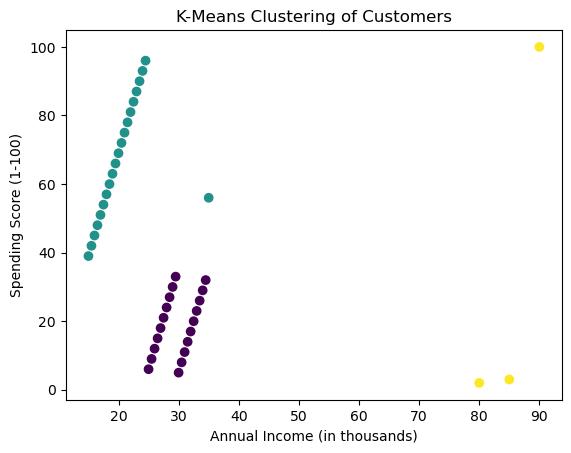

In [4]:
import matplotlib.pyplot as plt

# Plot K-Means clusters
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [5]:
from sklearn.cluster import DBSCAN

# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan.fit(df_scaled)

# Add DBSCAN cluster labels to the original dataframe
df['DBSCAN_Cluster'] = dbscan.labels_
print(df.head())

   AnnualIncome  SpendingScore  KMeans_Cluster  DBSCAN_Cluster
0          15.0             39               1               0
1          15.5             42               1               0
2          16.0             45               1               0
3          16.5             48               1               0
4          17.0             51               1               0


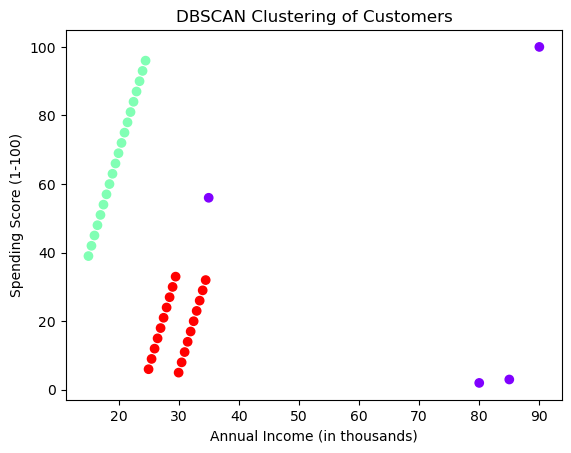

In [6]:
# Plot DBSCAN clusters
plt.scatter(df['AnnualIncome'], df['SpendingScore'], c=df['DBSCAN_Cluster'], cmap='rainbow')
plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Annual Income (in thousands)')
plt.ylabel('Spending Score (1-100)')
plt.show()